## Nataf - Example 1

Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.


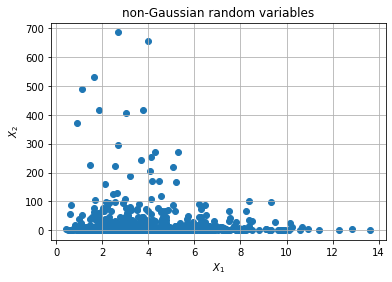

In [2]:
# Example 1a: Nataf transformation
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

x = MCS(dist_object=[dist1,dist2], nsamples=1000, random_state=5,   verbose=True)

# Plot the initial samples
plt.figure()
plt.title('non-Gaussian random variables')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [3]:
from UQpy.Transformations import Nataf
Rho = np.array([[1.0, 0.3], [0.3, 1.0]])
y = Nataf(dist_object=[dist1,dist2], samples_x=np.array([20, 7]).reshape(1, -1), corr_x=Rho)

print('Distorted correlation matrix', y.corr_z)
print(y.Jxy.shape)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.2998816935848832]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.12392056822736769]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.034768508290895866]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.008431574777820142]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0021221219429043356]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.0005292009872665013]
UQpy: ITAM Done.
Distorted correlation matrix [[1.         0.8626152

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
#plt.figure()
#plt.title('Correlated standard normal samples')
#plt.scatter(y.samples_y[:, 0], y.samples_y[:, 1])
#plt.grid(True)
#plt.xlabel('$Z_1$')
#plt.ylabel('$Z_2$')
#plt.show()

#print(x.samples)

plt.figure()
plt.title('Uncorrelated standard normal samples')
plt.scatter(y.samples_y[:, 0], y.samples_y[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

In [ ]:
from UQpy.Transformations import InvNataf

w = InvNataf(dist_object=[dist1,dist2], samples_y=y.samples_y, corr_z=y.corr_z)

print('Distorted correlation matrix', w.corr_x)

In [ ]:
plt.figure()
plt.title('Random samples')
plt.scatter(w.samples_x[:, 0], w.samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()


In [ ]:
w3 = np.zeros(10)
rho = np.linspace(-0.999, 0.999, 10)
for i in range(10):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf.distortion_x_to_z([dist1,dist2], Rho1)
    w3[i] = ww[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

In [ ]:
x2 = MCS(dist_object=dist1, nsamples=1000, random_state=2,  verbose=True)
y2 = Nataf(dist_object=dist1, samples_x=x2.samples)

In [ ]:
y3 = InvNataf(dist_object=dist1, samples_y=y2.samples_y)
print(y3.samples_x)

In [ ]:
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), 
             Lognormal(s=1., loc=0., scale=np.exp(5))]


dist = JointInd(marginals=marginals)
x1 = MCS(dist_object=dist, nsamples=1000,  verbose=True)

# Plot the initial samples
plt.figure()
plt.title('Random samples')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

y1 = Nataf(dist_object=dist, samples_x=x1.samples, beta=1.0, itam_error1=0.001,
                 itam_error2=0.01)

plt.figure()
plt.title('Standard normal samples')
plt.scatter(y1.samples_y[:, 0], y1.samples_y[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

In [ ]:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

N = 20
w4 = np.zeros(N)
rho = np.linspace(-0.999, 0.999, N)
for i in range(N):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Inverse.distortion_z_to_x(dist_object=[dist1,dist2], cov=Rho1)
    w4[i] = ww[0, 1]

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()

In [ ]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

x = MCS(dist_object=[dist1,dist2], nsamples=5, random_state=[4, 5],   verbose=True)
print(x.samples)

In [ ]:
Rho = np.array([[1.0, 0.8], [0.8, 1.0]])
print(Rho)
q = InvNataf(dist_object=[dist1,dist2], samples_y=y1.samples_y, corr_z=Rho)

In [ ]:
plt.figure()
plt.title('Standard normal samples')
plt.scatter(q.samples_x[:, 0], q.samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
plt.figure()
plt.title('Standard normal samples')
plt.scatter(q.samples_x[:, 0], q.samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()